In [ ]:
%matplotlib inline


# ROC Curve with Visualization API
Scikit-learn defines a simple API for creating visualizations for machine
learning. The key features of this API is to allow for quick plotting and
visual adjustments without recalculation. In this example, we will demonstrate
how to use the visualization API by comparing ROC curves.


## Load Data and Train a SVC
First, we load the wine dataset and convert it to a binary classification
problem. Then, we train a support vector classifier on a training dataset.



In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

X, y = load_wine(return_X_y=True)
y = y == 2

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

SVC(random_state=42)

## Plotting the ROC Curve
Next, we plot the ROC curve with a single call to
:func:`sklearn.metrics.RocCurveDisplay.from_estimator`. The returned
`svc_disp` object allows us to continue using the already computed ROC curve
for the SVC in future plots.



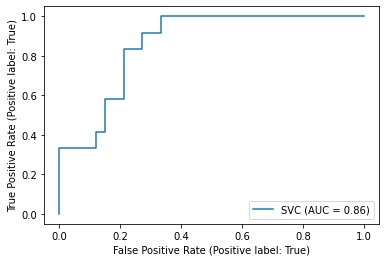

In [ ]:
svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
plt.show()

## Training a Random Forest and Plotting the ROC Curve
We train a random forest classifier and create a plot comparing it to the SVC
ROC curve. Notice how `svc_disp` uses
:func:`~sklearn.metrics.RocCurveDisplay.plot` to plot the SVC ROC curve
without recomputing the values of the roc curve itself. Furthermore, we
pass `alpha=0.8` to the plot functions to adjust the alpha values of the
curves.



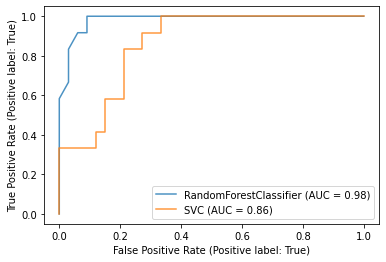

In [ ]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
plt.show()